Architecture of a neural netwrok regression.
1. Input layer shape - Same shape as number of features.
2. Hidden layer - minimum:1 , maximum: unlimited.
3. Neurons per hidden layer - Problem specific, generally 10 to 100.
4. Output layer shape : Same shape as desired predition shape.
5. Hidden activation - Usually ReLU
6. Output activation - None, ReLU, logistic/tanh
7. Loss function - MSE, MAE if outliers
8. Optimizer - SGD, Adam

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

## Steps in modelling with tensorflow
1. **Creating a model** - define the input and output layers as well as the hidden layers.
2. **Compiling a model** - define the loss function, optimizer, evaluation metrics.
3. Fitting a model - Letting a model to try to find patterns between features and labels.

In [3]:
import numpy as np
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array( [3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [4]:
tf.random.set_seed(42)

#create a model using sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#Compiling model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 15.2406 - mae: 15.2406
Epoch 2/10
1/1 [==============================] - 0s 24ms/step - loss: 14.9692 - mae: 14.9692
Epoch 3/10
1/1 [==============================] - 0s 31ms/step - loss: 14.8367 - mae: 14.8367
Epoch 4/10
1/1 [==============================] - 0s 17ms/step - loss: 14.7042 - mae: 14.7042
Epoch 5/10
1/1 [==============================] - 0s 22ms/step - loss: 14.5717 - mae: 14.5717
Epoch 6/10
1/1 [==============================] - 0s 17ms/step - loss: 14.4392 - mae: 14.4392
Epoch 7/10
1/1 [==============================] - 0s 43ms/step - loss: 14.3067 - mae: 14.3067
Epoch 8/10
1/1 [==============================] - 0s 22ms/step - loss: 14.1742 - mae: 14.1742
Epoch 9/10
1/1 [==============================] - 0s 21ms/step - loss: 14.0417 - mae: 14.0417
Epoch 10/10
1/1 [==============================] - 0s 26ms/step - loss: 13.9092 - mae: 13.9092


In [5]:
model.predict([17.0])

1/1 [==============================] - 0s 382ms/step


array([[-1.7198721]], dtype=float32)

### Improving the model

1. Creating a model - Here we can **add more layers**, increase the number of hidden units with each of the hidden layers, **change the activation functions** of each layer.
2. Compiling a model - Change the optimization function or maybe the **learning rate** of the function.
3. Fitting a model - Fit the model for **more epochs**.


The lower the learning rate, the smaller the steps the optimizer tells the neural network to improve.

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 16.7010 - mae: 16.7010
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 16.4198 - mae: 16.4198
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 16.1385 - mae: 16.1385
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 15.8573 - mae: 15.8573
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 15.5760 - mae: 15.5760
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 15.2948 - mae: 15.2948
Epoch 7/100
1/1 [==============================] - 0s 43ms/step - loss: 15.0135 - mae: 15.0135
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 14.7953 - mae: 14.7953
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 14.6628 - mae: 14.6628
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 14.5303 - mae: 14.5303
Epoch 11/100
1/1 [==============================] -

In [7]:
model.predict([17.0])

1/1 [==============================] - 0s 108ms/step


array([[29.45618]], dtype=float32)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 929ms/step - loss: 17.3990 - mae: 17.3990
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 16.7990 - mae: 16.7990
Epoch 3/100
1/1 [==============================] - 0s 28ms/step - loss: 16.1990 - mae: 16.1990
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 15.5990 - mae: 15.5990
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 14.9990 - mae: 14.9990
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 14.3990 - mae: 14.3990
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 13.8994 - mae: 13.8994
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 13.4569 - mae: 13.4569
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 13.0200 - mae: 13.0200
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 12.5871 - mae: 12.5871
Epoch 11/100
1/1 [==============================

In [9]:
model.predict([17.0])

1/1 [==============================] - 0s 104ms/step


array([[27.871895]], dtype=float32)

### Evaluating the model


In [10]:
X = tf.range(-100, 100, 4)
y = X+10
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

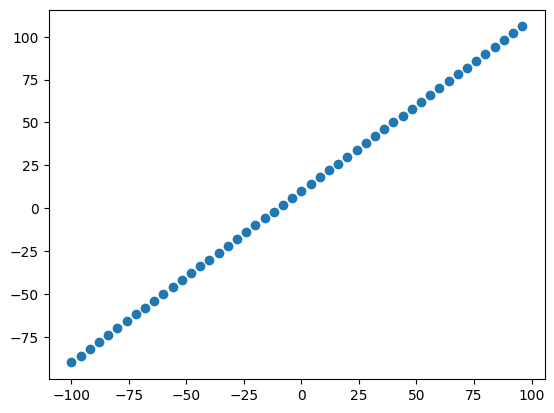

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X, y);

Train, test and validation sets.


In [12]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

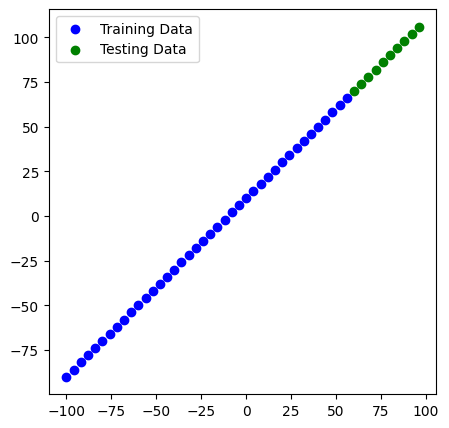

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train, c='b', label="Training Data")
plt.scatter(X_test, y_test, c='g', label="Testing Data")
plt.legend();

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mae'])
#model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


1. Total params - total number of parameters in the model.
2. Trainable parameters - parameters the model can update as it trains.
3. Non-trainable parameters - parameters that aren't updated during training.

In [16]:
model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=2)

Epoch 1/100
2/2 - 2s - loss: 96.6988 - mae: 96.6988 - 2s/epoch - 817ms/step
Epoch 2/100
2/2 - 0s - loss: 87.9269 - mae: 87.9269 - 20ms/epoch - 10ms/step
Epoch 3/100
2/2 - 0s - loss: 79.4574 - mae: 79.4574 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 70.8485 - mae: 70.8485 - 18ms/epoch - 9ms/step
Epoch 5/100
2/2 - 0s - loss: 62.3973 - mae: 62.3973 - 21ms/epoch - 11ms/step
Epoch 6/100
2/2 - 0s - loss: 53.8758 - mae: 53.8758 - 21ms/epoch - 10ms/step
Epoch 7/100
2/2 - 0s - loss: 45.3654 - mae: 45.3654 - 24ms/epoch - 12ms/step
Epoch 8/100
2/2 - 0s - loss: 36.5745 - mae: 36.5745 - 15ms/epoch - 7ms/step
Epoch 9/100
2/2 - 0s - loss: 28.4630 - mae: 28.4630 - 22ms/epoch - 11ms/step
Epoch 10/100
2/2 - 0s - loss: 20.5790 - mae: 20.5790 - 19ms/epoch - 9ms/step
Epoch 11/100
2/2 - 0s - loss: 12.9738 - mae: 12.9738 - 29ms/epoch - 14ms/step
Epoch 12/100
2/2 - 0s - loss: 8.9450 - mae: 8.9450 - 11ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 12.0298 - mae: 12.0298 - 60ms/epoch - 30ms/step
Epo

In [17]:
y_pred = model.predict([X_test])
y_pred

1/1 [==============================] - 0s 157ms/step


array([[ 68.83496 ],
       [ 72.75749 ],
       [ 76.680016],
       [ 80.60255 ],
       [ 84.52507 ],
       [ 88.4476  ],
       [ 92.370125],
       [ 96.292656],
       [100.21518 ],
       [104.13771 ]], dtype=float32)

In [18]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [19]:
mae_1 = mae(y_test, y_pred.squeeze()).numpy()
mse_1 = mse(y_test, y_pred.squeeze()).numpy()
mae_1, mse_1

(1.5136642, 2.3406959)

In [20]:
y_pred=model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 357ms/step - loss: 1.5137 - mae: 1.5137


### Running experiments to improve model
1. Maybe try with more hidden layers.
2. Change the larning rate.
3. Increase the number of epochs.

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mae'])
model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 13ms/step - loss: 27.6999 - mae: 27.6999
Epoch 2/50
2/2 [==============================] - 0s 17ms/step - loss: 19.3736 - mae: 19.3736
Epoch 3/50
2/2 [==============================] - 0s 7ms/step - loss: 13.0923 - mae: 13.0923
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: 8.9969 - mae: 8.9969
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 8.2640 - mae: 8.2640
Epoch 6/50
2/2 [==============================] - 0s 13ms/step - loss: 10.1379 - mae: 10.1379
Epoch 7/50
2/2 [==============================] - 0s 15ms/step - loss: 9.8605 - mae: 9.8605
Epoch 8/50
2/2 [==============================] - 0s 10ms/step - loss: 7.9113 - mae: 7.9113
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 6.4209 - mae: 6.4209
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 7.8149 - mae: 7.8149
Epoch 11/50
2/2 [==============================] - 0s 9ms/step - loss: 8.790

In [22]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
model_2.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 19ms/step - loss: 37.9928 - mae: 37.9928
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 29.6785 - mae: 29.6785
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 33.4807 - mae: 33.4807
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 13.8508 - mae: 13.8508
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 19.0236 - mae: 19.0236
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.5161 - mae: 9.5161
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 10.5461 - mae: 10.5461
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 12.9112 - mae: 12.9112
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 33.9745 - mae: 33.9745
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 23.2721 - mae: 23.2721
Epoch 11/100
2/2 [==============================] - 0s 8ms

In [23]:
y_preds_2=model_2.predict(X_test)

1/1 [==============================] - 0s 88ms/step


In [24]:
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(10.669653, 121.62886)

In [25]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

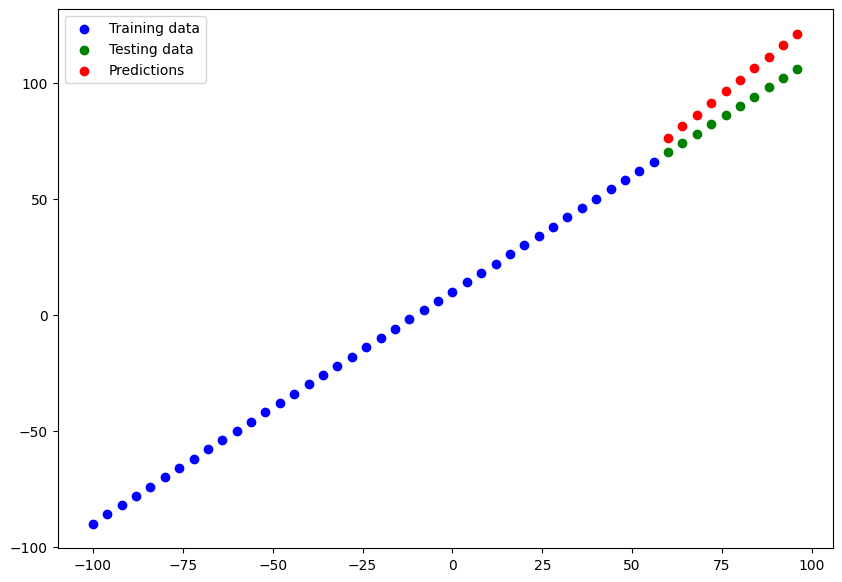

In [26]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_2)

In [27]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
               metrics=['mae'])
model_3.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 24.8553 - mae: 24.8553
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 16.8749 - mae: 16.8749
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6367 - mae: 11.6367
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 7.8920 - mae: 7.8920
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.2533 - mae: 10.2533
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8388 - mae: 11.8388
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8686 - mae: 10.8686
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 8.2138 - mae: 8.2138
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 6.4782 - mae: 6.4782
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 8.2073 - mae: 8.2073
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

In [28]:
y_preds_3=model_3.predict(X_test)

1/1 [==============================] - 0s 66ms/step


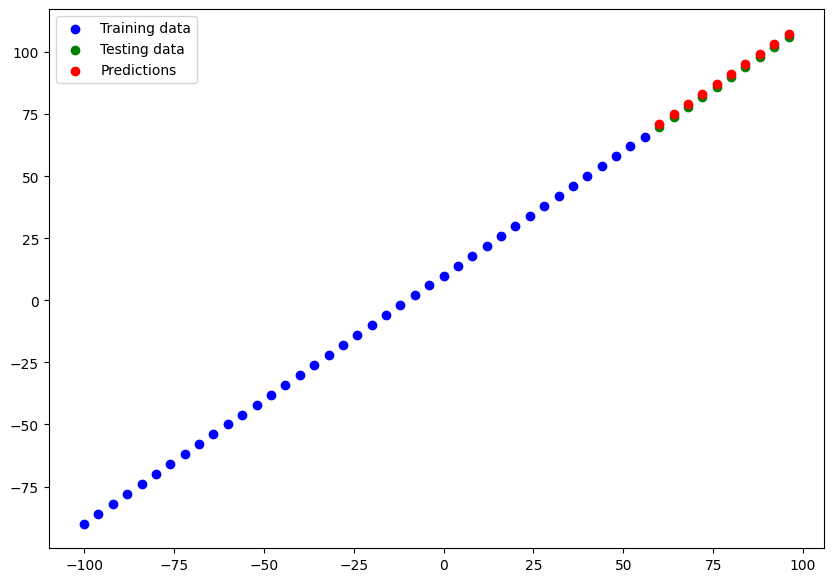

In [29]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_3)

In [30]:
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(1.1409905, 1.3321484)

In [31]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [32]:

import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,1.513664,2.340696
1,model_2,10.669653,121.628860
2,model_3,1.140990,1.332148


In [34]:
model_3.save('best_model_format')